In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# ✅ STEP 2: Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [8]:
# ✅ STEP 3: Load Dataset
file_path = "/content/drive/MyDrive/Iris species.csv"
df = pd.read_csv(file_path)

# Optional: Show column names to verify
print("📊 Dataset columns:", df.columns)

📊 Dataset columns: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [9]:
# ✅ STEP 4: Drop 'Id' column and Encode 'Species'
df = df.drop('Id', axis=1)

label_enc = LabelEncoder()
df['Species'] = label_enc.fit_transform(df['Species'])  # 0, 1, 2

In [10]:
# ✅ STEP 5: Split Features and Target
X = df.drop('Species', axis=1).values
y = df['Species'].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create DataLoaders
train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=16)


In [11]:
# ✅ STEP 6: Define Neural Network
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(4, 10),
            nn.ReLU(),
            nn.Linear(10, 3)
        )

    def forward(self, x):
        return self.model(x)

model = IrisNet()


In [12]:
# ✅ STEP 7: Loss Function & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [13]:
# ✅ STEP 8: Train the Model
train_acc_list = []
test_acc_list = []

for epoch in range(50):
    model.train()
    correct = total = 0

    for xb, yb in train_loader:
        outputs = model(xb)
        loss = criterion(outputs, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += yb.size(0)
        correct += (predicted == yb).sum().item()

    train_acc = 100 * correct / total
    train_acc_list.append(train_acc)

    # Test Accuracy
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for xb, yb in test_loader:
            outputs = model(xb)
            _, predicted = torch.max(outputs.data, 1)
            total += yb.size(0)
            correct += (predicted == yb).sum().item()

    test_acc = 100 * correct / total
    test_acc_list.append(test_acc)

    print(f"Epoch [{epoch+1}/50] | Train Acc: {train_acc:.2f}% | Test Acc: {test_acc:.2f}%")


Epoch [1/50] | Train Acc: 49.17% | Test Acc: 56.67%
Epoch [2/50] | Train Acc: 58.33% | Test Acc: 60.00%
Epoch [3/50] | Train Acc: 59.17% | Test Acc: 63.33%
Epoch [4/50] | Train Acc: 61.67% | Test Acc: 63.33%
Epoch [5/50] | Train Acc: 61.67% | Test Acc: 63.33%
Epoch [6/50] | Train Acc: 65.00% | Test Acc: 66.67%
Epoch [7/50] | Train Acc: 66.67% | Test Acc: 73.33%
Epoch [8/50] | Train Acc: 67.50% | Test Acc: 73.33%
Epoch [9/50] | Train Acc: 68.33% | Test Acc: 76.67%
Epoch [10/50] | Train Acc: 70.00% | Test Acc: 76.67%
Epoch [11/50] | Train Acc: 71.67% | Test Acc: 80.00%
Epoch [12/50] | Train Acc: 70.83% | Test Acc: 80.00%
Epoch [13/50] | Train Acc: 70.83% | Test Acc: 86.67%
Epoch [14/50] | Train Acc: 72.50% | Test Acc: 86.67%
Epoch [15/50] | Train Acc: 72.50% | Test Acc: 90.00%
Epoch [16/50] | Train Acc: 74.17% | Test Acc: 90.00%
Epoch [17/50] | Train Acc: 75.83% | Test Acc: 90.00%
Epoch [18/50] | Train Acc: 76.67% | Test Acc: 90.00%
Epoch [19/50] | Train Acc: 78.33% | Test Acc: 90.00%
Ep

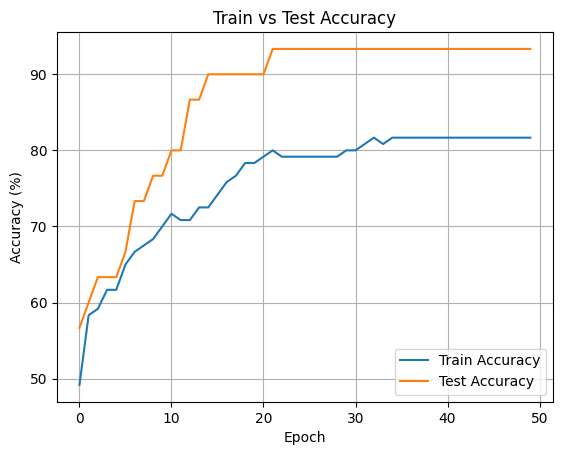

In [14]:
# ✅ STEP 9: Plot Accuracy
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(test_acc_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()
